## DATA 255: Homework 01 (PyTorch)

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
print(torch.__version__)

2.4.0


#### Step 1. Import the data from the given .csv file (diabetes.csv Download diabetes.csv). The first few columns contain the data while the last column is a binary class label of 0 or 1

In [3]:
diabetes = pd.read_csv('diabetes.csv')

In [4]:
diabetes.head()

,-0.294118,0.487437,0.180328,-0.292929,0,0.00149028,-0.53117,-0.0333333,0.1
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


#### Step 2. Preprocess the data as you see fit and show basic data visualization for better understanding of data

In [5]:
diabetes.shape

(758, 9)

In [6]:
diabetes.columns

Index(['-0.294118', '0.487437', '0.180328', '-0.292929', '0', '0.00149028',
       '-0.53117', '-0.0333333', '0.1'],
      dtype='object')

In [7]:
# Rename the columns as initial columns are just numbers without any relevance/meaning
cols = ['feat1', 'feat2', 'feat3', 'feat4', 'feat5', 'feat6', 'feat7', 'feat8', 'label']
diabetes = pd.read_csv('diabetes.csv', header =0, names= cols)
diabetes.head(2)

,feat1,feat2,feat3,feat4,feat5,feat6,feat7,feat8,label
0,-0.882353,-0.145729,0.081967,-0.414141,0.0,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.0,-0.305514,-0.492741,-0.633333,0


In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   feat1   758 non-null    float64
 1   feat2   758 non-null    float64
 2   feat3   758 non-null    float64
 3   feat4   758 non-null    float64
 4   feat5   758 non-null    float64
 5   feat6   758 non-null    float64
 6   feat7   758 non-null    float64
 7   feat8   758 non-null    float64
 8   label   758 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 53.4 KB


All the datatypes seems to be appropriate, no need to change them

In [9]:
diabetes.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
feat1,758.0,-0.407807,0.386493,-0.882353,-0.764706,-0.529412,0.000000,1.0
feat2,758.0,0.218208,0.306465,-0.557789,-0.005025,0.165829,0.407035,1.0
feat3,758.0,0.176500,0.201420,-0.606557,0.016393,0.180328,0.311475,1.0
feat4,758.0,-0.289731,0.258651,-0.858586,-0.494949,-0.292929,0.000000,1.0
feat5,758.0,-0.323961,0.375608,-0.966903,-0.716312,0.000000,0.000000,1.0
feat6,758.0,-0.032289,0.205508,-0.457526,-0.179583,-0.034277,0.087929,1.0
feat7,758.0,-0.663427,0.283202,-0.994876,-0.858241,-0.748506,-0.532451,1.0
feat8,758.0,-0.516799,0.400674,-0.966667,-0.866667,-0.633333,-0.233333,1.0
label,758.0,0.654354,0.475893,0.000000,0.000000,1.000000,1.000000,1.0


From the above stats, we see that data has min of around -1 and strict max of 1. This tells us that data has been normalised in some way to have similar range of values for all features. We see that data is centered around 0 i.e mean values are close to 0 and standard deviations are relatively small. We can assume it could be normalised in the range [-1,1], no further scaling needed.

In [10]:
diabetes.isna().sum()

feat1    0
feat2    0
feat3    0
feat4    0
feat5    0
feat6    0
feat7    0
feat8    0
label    0
dtype: int64

There are no null values in the dataset

Check the number of instances o label column, to see if its balanced or not

<Axes: xlabel='label'>

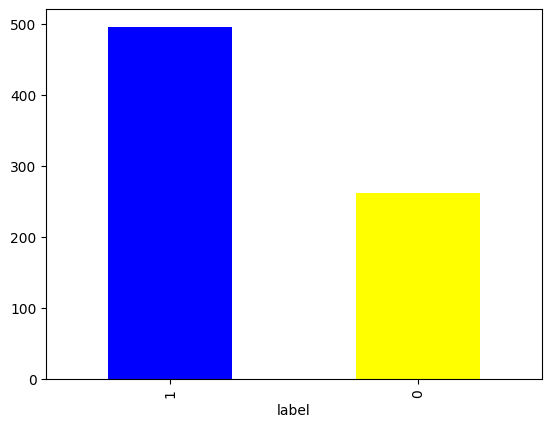

In [11]:
diabetes['label'].value_counts().plot(kind = 'bar', color = ['blue','yellow'])

This looks to be relatively balanced

Checking the correlation between features. Viewing wrt label

<Axes: >

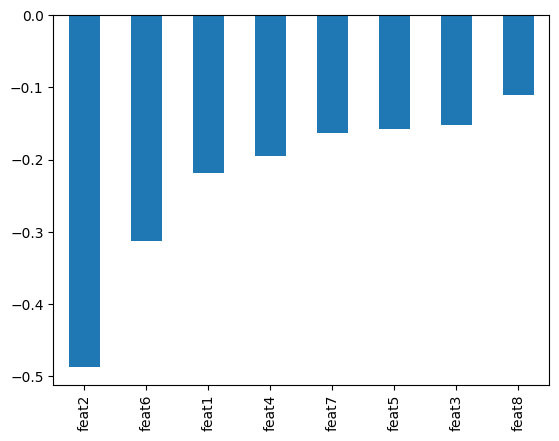

In [12]:
diabetes.corr()['label'][:-1].sort_values().plot(kind = 'bar')

<Axes: >

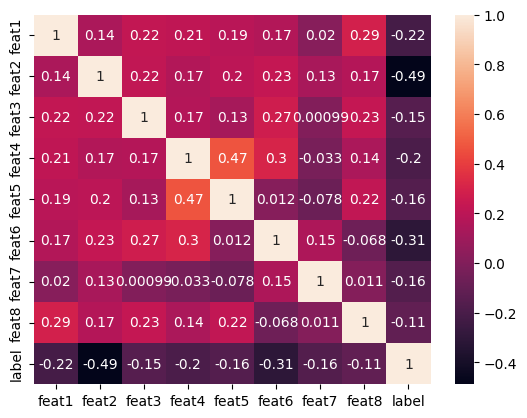

In [13]:
# correlation between actual variables themselves, we see that highest corelation is between col4 and col5
sns.heatmap(diabetes.corr(), annot= True)

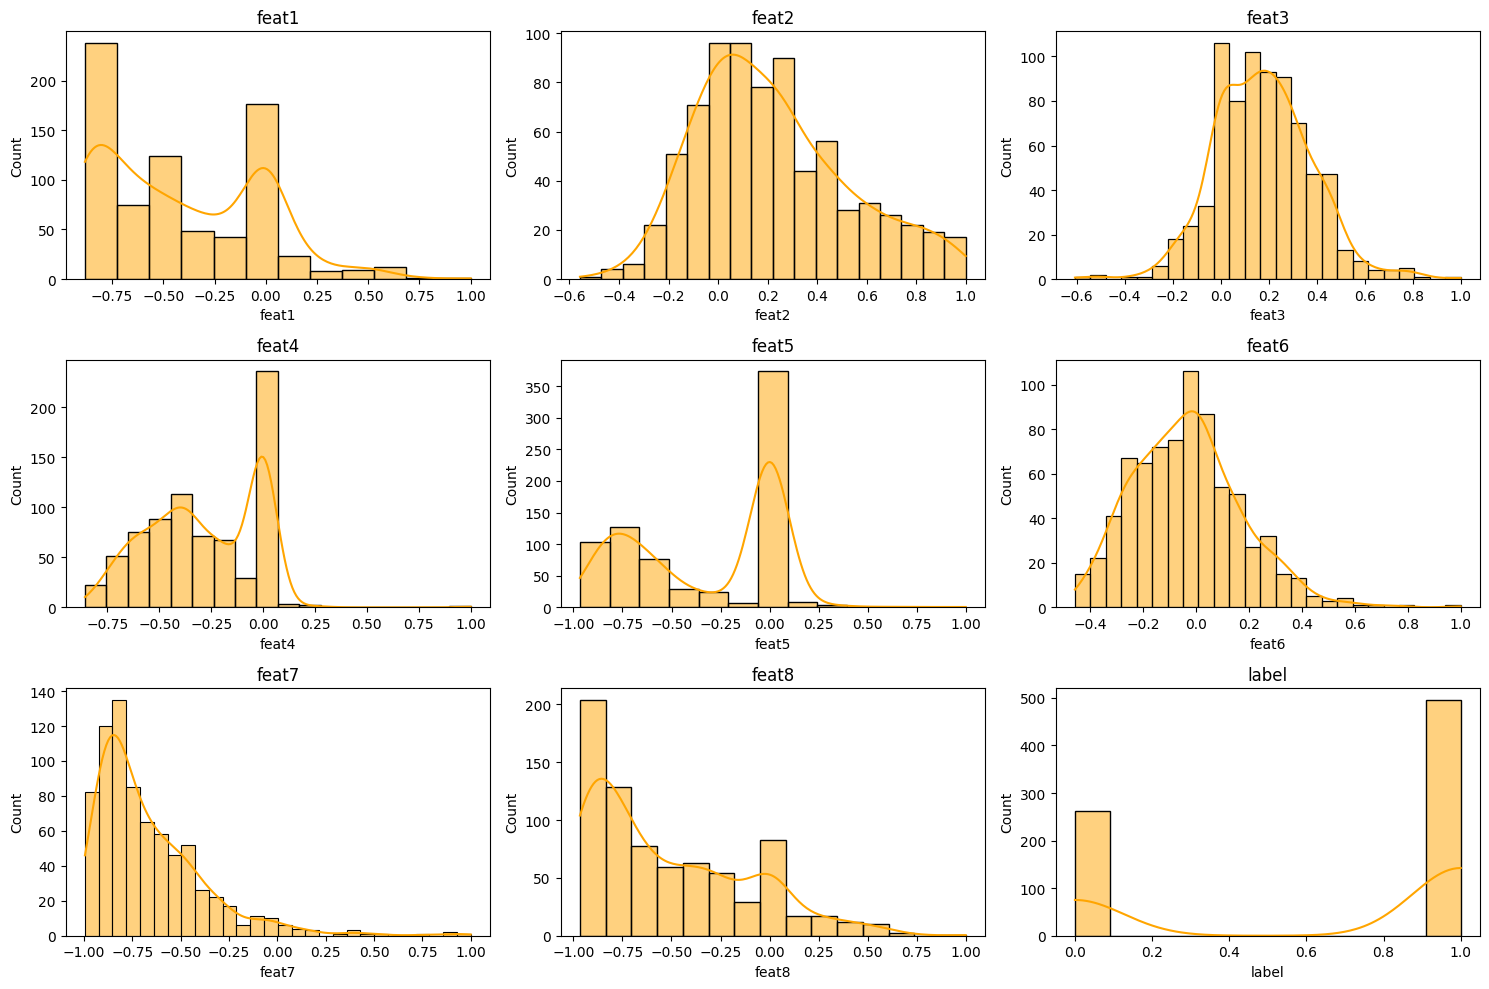

In [14]:
# distribution plot for all attributes to see features if they are normally distributed

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, column in enumerate(diabetes.columns):
    row = i // 3
    col = i % 3
    sns.histplot(diabetes[column], ax=axes[row, col], kde=True, color = 'orange')
    axes[row, col].set_title(column)

plt.tight_layout()
plt.show()

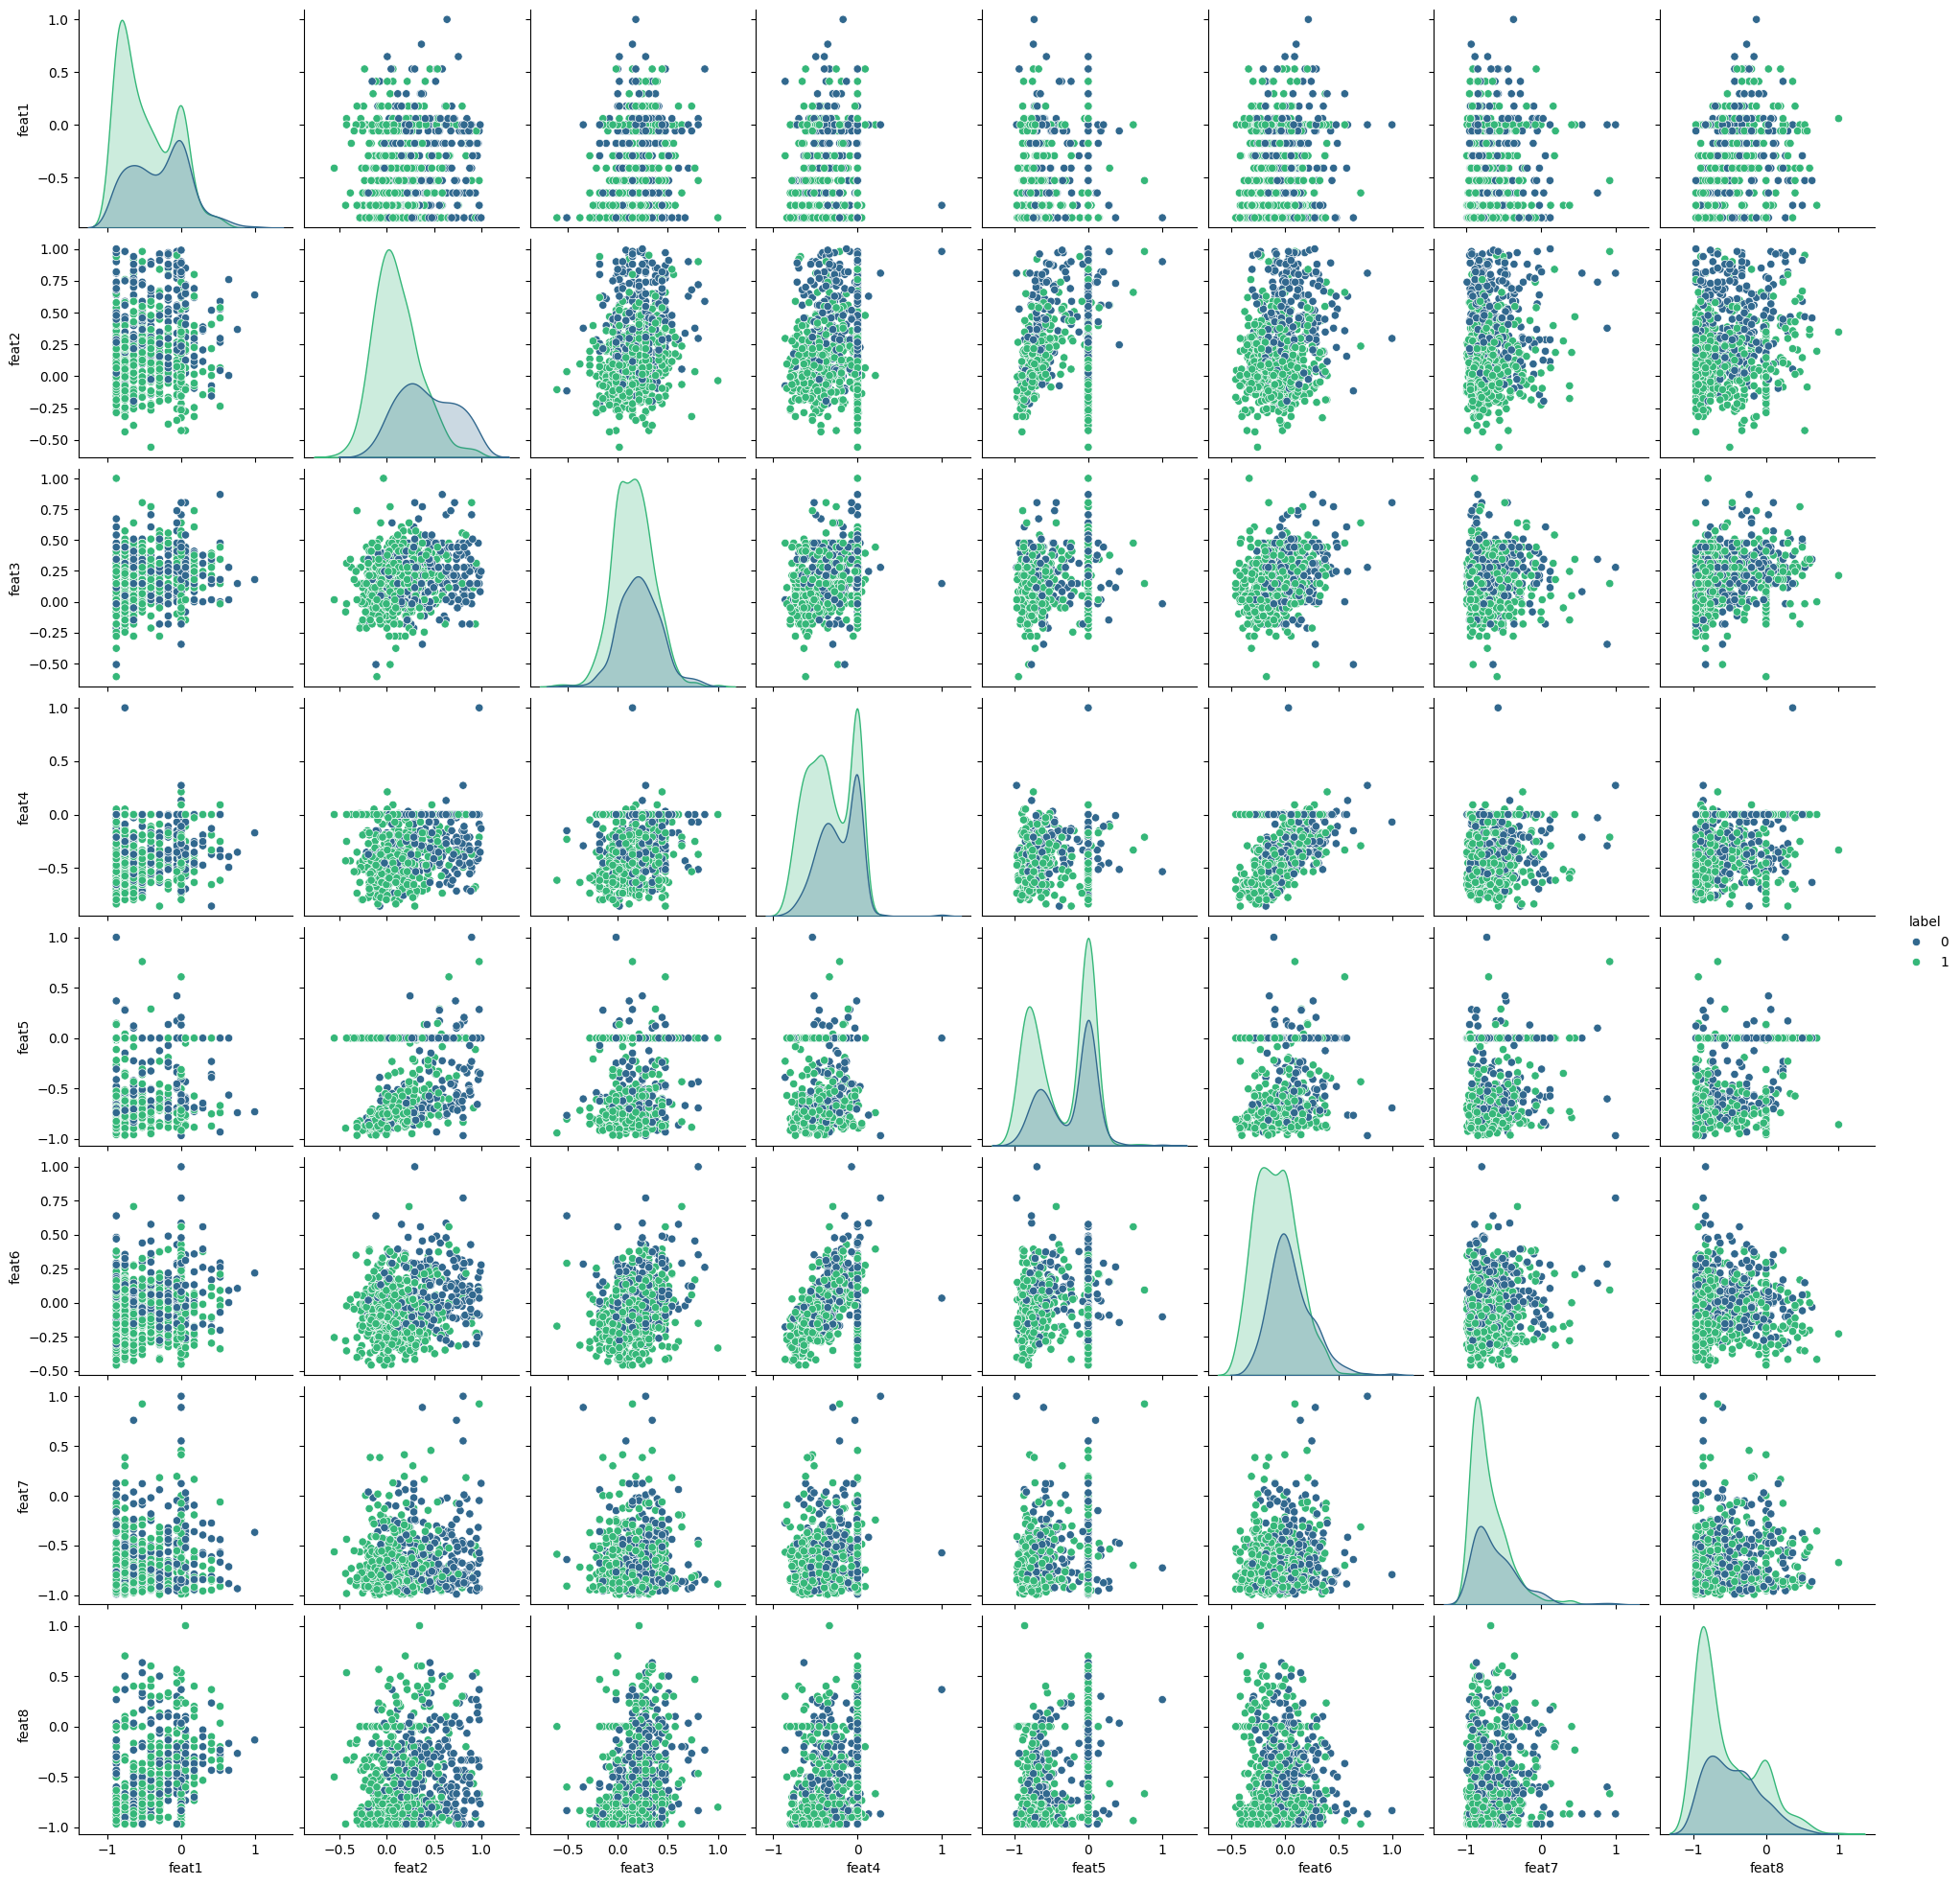

In [15]:
# visualising the relationship between features and to see the outliers in broader view
sns.pairplot(diabetes, hue = 'label', palette = 'viridis')

#### Step 3. Split into 70% train 30% test

In [16]:
#convert the diabetes into numpy array

diabetes_n = np.array(diabetes, dtype = np.float32)

X_diabetes = diabetes_n[:,:-1]
y_diabetes = diabetes_n[:,[-1]]

print("X_diabetes Shape:", X_diabetes.shape)
print("y_diabetes Shape:", y_diabetes.shape)

X_diabetes Shape: (758, 8)
y_diabetes Shape: (758, 1)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_diabetes,y_diabetes, test_size=0.3,random_state=101)

As we have already mentioned above, data is already scaled in the range (could be [-1,1]), no need to perform scaling step. Scaling is important as we are working with weights and biases in neural network, if we have large values in the features then that could cause errors in the weights. So to avoid any issues its better to scale the data. 

#### Step 4. Modify the model shown in the demo to take the new data

In [18]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, Dataset, DataLoader
import torch.nn.functional as F

from torch.nn import CrossEntropyLoss

In [19]:
X_train.shape

(530, 8)

In [20]:
X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()

In [21]:
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

In [22]:
# Creating the model (Little modifications in the parameters to fit for the dataset)
linear_model = nn.Sequential(
    nn.Linear(X_train.shape[1],1),
    nn.Sigmoid()
)

In [23]:
linear_predictions = linear_model(X_train)
print(linear_predictions.shape)

torch.Size([530, 1])


In [24]:
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.SGD(linear_model.parameters(), lr=0.01)

#### Step 5: Train the model on the data


In [25]:
# Training loop
num_epochs = 3

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    linear_model.train()  
    
    y_pred = linear_model(X_train)
    loss = criterion(y_pred, y_train)
    
    
    optimizer.zero_grad()  
    loss.backward()        
    optimizer.step()       

    train_losses.append(loss.item())

In [26]:
# Calculate training accuracy
with torch.no_grad():
    y_pred_train_class = (y_pred >= 0.5).float()
    train_accuracy = (y_pred_train_class == y_train).sum().item() / y_train.size(0)
    train_accuracies.append(train_accuracy)

#### Step 6: Evaluate the Model Performance on test data
#### Step 7: Calculate the accuracy of your results

In [27]:
 # Validation phase
linear_model.eval()  
with torch.no_grad():
    y_val = linear_model(X_test)
    val_loss = criterion(y_val, y_test)
    val_losses.append(val_loss.item())
    
    y_pred_val_class = (y_val >= 0.5).float()
    val_accuracy = (y_pred_val_class == y_test).sum().item() / y_test.size(0)
    val_accuracies.append(val_accuracy)

print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Train Acc: {train_accuracy*100:.2f}%, Val Acc: {val_accuracy*100:.2f}%')

Epoch [3/3], Train Loss: 0.6574, Val Loss: 0.6398, Train Acc: 63.40%, Val Acc: 65.79%


This was the very basic model with just input and output layer. We see that at the third epoch, training loss is little greater than val loss(test set) and accuracy is low for training as compared to validation set. This does not give clear picture as to what is happening, may be this is overfitting. Also, Model's loss is very high, and accuracy is low. Therefore, We need to make changes to our Neural network for better results.

#### Step 8. Hypothesize changes you can make to the model. 

In [28]:
#Added the 2 hidden layer and the activation function was used is ReLU 
#and for last output layer it is Sigmoid as we have Binary classification case

class Model(nn.Module):
    def __init__(self, input_features = 8, h1=18, h2=10, out_features=1):
        super(Model,self).__init__()
        self.fc1 = nn.Linear(input_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_features)

    def forward(self,x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.sigmoid(self.out(x))
        return x
        
torch.manual_seed(4)
model = Model()

In [29]:
criterion = nn.BCELoss() # loss function for Binary Classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [30]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=8, out_features=18, bias=True)
  (fc2): Linear(in_features=18, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=1, bias=True)
)>

In [31]:
#Training the model

In [32]:
epochs = 150
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
for epoch in range(epochs):
    model.train()  # model to Train mode

    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    train_losses.append(loss.item())

    y_pred_train_class = (y_pred >= 0.5).float()
    train_accuracy = (y_pred_train_class == y_train).sum().item() / y_train.size(0)
    train_accuracies.append(train_accuracy)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation phase
    model.eval()  # model to evaluation mode
    with torch.no_grad():
        y_val = model.forward(X_test)
        val_loss = criterion(y_val, y_test)
        test_losses.append(val_loss.item())

        y_pred_val_class = (y_val >= 0.5).float()
        test_accuracy = (y_pred_val_class == y_test).sum().item() / y_test.size(0)
        test_accuracies.append(test_accuracy)

    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Train Acc: {train_accuracy*100:.2f}%, Val Acc: {test_accuracy*100:.2f}%')

print('Finished Training')

Epoch [1/150], Train Loss: 0.7425, Val Loss: 0.7407, Train Acc: 35.47%, Val Acc: 32.46%
Epoch [11/150], Train Loss: 0.6573, Val Loss: 0.6379, Train Acc: 71.70%, Val Acc: 72.37%
Epoch [21/150], Train Loss: 0.5481, Val Loss: 0.5169, Train Acc: 70.57%, Val Acc: 75.44%
Epoch [31/150], Train Loss: 0.4847, Val Loss: 0.4509, Train Acc: 76.79%, Val Acc: 78.95%
Epoch [41/150], Train Loss: 0.4757, Val Loss: 0.4341, Train Acc: 76.04%, Val Acc: 77.63%
Epoch [51/150], Train Loss: 0.4644, Val Loss: 0.4362, Train Acc: 76.42%, Val Acc: 79.39%
Epoch [61/150], Train Loss: 0.4593, Val Loss: 0.4350, Train Acc: 76.23%, Val Acc: 78.95%
Epoch [71/150], Train Loss: 0.4539, Val Loss: 0.4302, Train Acc: 77.36%, Val Acc: 78.07%
Epoch [81/150], Train Loss: 0.4477, Val Loss: 0.4308, Train Acc: 76.98%, Val Acc: 78.95%
Epoch [91/150], Train Loss: 0.4408, Val Loss: 0.4326, Train Acc: 77.36%, Val Acc: 78.95%
Epoch [101/150], Train Loss: 0.4337, Val Loss: 0.4357, Train Acc: 79.06%, Val Acc: 78.07%
Epoch [111/150], Trai

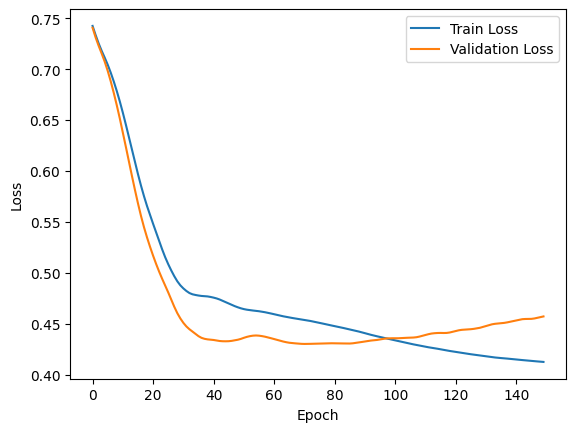

In [33]:
#plotting the training and validation loss
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

##### This seems to be a balanced model, which is not overfitting the training data. Initially the validation and training loss both begin to go down and then after the 100th epoch they both meet and  spread out, that tells that we can stop our training at that point. Don't feel the need to hypothesise further but for our understanding we will do tweaking of neurons and layers

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(classification_report(y_test,y_pred_val_class))
confusion_matrix(y_test,y_pred_val_class)

              precision    recall  f1-score   support

         0.0       0.70      0.58      0.64        74
         1.0       0.81      0.88      0.85       154

    accuracy                           0.79       228
   macro avg       0.76      0.73      0.74       228
weighted avg       0.78      0.79      0.78       228



array([[ 43,  31],
       [ 18, 136]])

#### Second Model: Trying with diffrent parameters

In [35]:
# added the hidden layer and changed the neurons
class Model(nn.Module):
    def __init__(self, input_features = 8, h1=21, h2=11, h3=8, out_features=1):
        super(Model,self).__init__()
        self.fc1 = nn.Linear(input_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.fc3 = nn.Linear(h2,h3)
        self.out = nn.Linear(h3,out_features)

    def forward(self,x):
        x = nn.functional.relu(self.fc1(x))
        x = nn.functional.relu(self.fc2(x))
        x = nn.functional.relu(self.fc3(x))
        x = nn.functional.sigmoid(self.out(x))
        return x
        
torch.manual_seed(4)
model_2 = Model()

In [36]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model_2.parameters(), lr=0.001)

In [37]:
epochs = 150
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
for epoch in range(epochs):
    model_2.train()  

    y_pred = model_2.forward(X_train)
    loss = criterion(y_pred, y_train)
    train_losses.append(loss.item())

    y_pred_train_class = (y_pred >= 0.5).float()
    train_accuracy = (y_pred_train_class == y_train).sum().item() / y_train.size(0)
    train_accuracies.append(train_accuracy)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation phase
    model_2.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        y_val = model_2.forward(X_test)
        val_loss = criterion(y_val, y_test)
        test_losses.append(val_loss.item())

        y_pred_val_class = (y_val >= 0.5).float()
        test_accuracy = (y_pred_val_class == y_test).sum().item() / y_test.size(0)
        test_accuracies.append(test_accuracy)

    if epoch % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}, Train Acc: {train_accuracy*100:.2f}%, Val Acc: {test_accuracy*100:.2f}%')

print('Finished Training')

Epoch [1/150], Train Loss: 0.6612, Val Loss: 0.6520, Train Acc: 64.53%, Val Acc: 67.54%
Epoch [11/150], Train Loss: 0.6594, Val Loss: 0.6495, Train Acc: 64.53%, Val Acc: 67.54%
Epoch [21/150], Train Loss: 0.6568, Val Loss: 0.6461, Train Acc: 64.53%, Val Acc: 67.54%
Epoch [31/150], Train Loss: 0.6538, Val Loss: 0.6423, Train Acc: 64.53%, Val Acc: 67.54%
Epoch [41/150], Train Loss: 0.6503, Val Loss: 0.6379, Train Acc: 64.53%, Val Acc: 67.54%
Epoch [51/150], Train Loss: 0.6457, Val Loss: 0.6323, Train Acc: 64.53%, Val Acc: 67.54%
Epoch [61/150], Train Loss: 0.6393, Val Loss: 0.6251, Train Acc: 64.53%, Val Acc: 67.54%
Epoch [71/150], Train Loss: 0.6306, Val Loss: 0.6150, Train Acc: 64.53%, Val Acc: 67.54%
Epoch [81/150], Train Loss: 0.6185, Val Loss: 0.6010, Train Acc: 64.53%, Val Acc: 67.54%
Epoch [91/150], Train Loss: 0.6022, Val Loss: 0.5830, Train Acc: 64.53%, Val Acc: 67.54%
Epoch [101/150], Train Loss: 0.5826, Val Loss: 0.5610, Train Acc: 65.66%, Val Acc: 69.30%
Epoch [111/150], Trai

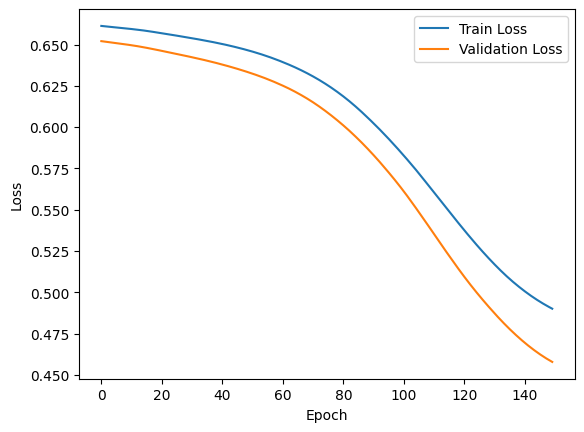

In [38]:
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

This is also not bad, but previous model was better where we saw the point validation loss started to increase, showing the point to stop training firther.

##### Method 3: lets try different method: Where output parameters(neurons) would be 2 i.e considering the one hot encoding label.i.e First neuron has diabetes, other has no diabetes, and from these two neurons the highest value neuron will be considered. The last layer would also go through Relu instaed of Sigmoid.  

In [39]:
cols = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'label']
df = pd.read_csv('diabetes.csv', header =0, names= cols)
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,label
0,-0.882353,-0.145729,0.081967,-0.414141,0.000000,-0.207153,-0.766866,-0.666667,1
1,-0.058824,0.839196,0.049180,0.000000,0.000000,-0.305514,-0.492741,-0.633333,0
2,-0.882353,-0.105528,0.081967,-0.535354,-0.777778,-0.162444,-0.923997,0.000000,1
3,0.000000,0.376884,-0.344262,-0.292929,-0.602837,0.284650,0.887276,-0.600000,0
4,-0.411765,0.165829,0.213115,0.000000,0.000000,-0.236960,-0.894962,-0.700000,1


In [40]:
X=df.drop('label',axis=1).values
y=df['label'].values

In [41]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [42]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [43]:
class Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=F.relu(self.f_connected1(x))
        x=F.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [44]:
torch.manual_seed(20)
model_3 = Model()

In [45]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model_3.parameters(),lr=0.01)

Epoch: 1/1000, Training Loss: 0.7170667052268982, Validation Loss: 0.6907111406326294
Epoch: 11/1000, Training Loss: 0.6077263951301575, Validation Loss: 0.6169180870056152
Epoch: 21/1000, Training Loss: 0.5284979939460754, Validation Loss: 0.5201621651649475
Epoch: 31/1000, Training Loss: 0.4701542556285858, Validation Loss: 0.46489766240119934
Epoch: 41/1000, Training Loss: 0.45148783922195435, Validation Loss: 0.4410415589809418
Epoch: 51/1000, Training Loss: 0.43626126646995544, Validation Loss: 0.4353303909301758
Epoch: 61/1000, Training Loss: 0.4238406717777252, Validation Loss: 0.4347240626811981
Epoch: 71/1000, Training Loss: 0.41558194160461426, Validation Loss: 0.4348446726799011
Epoch: 81/1000, Training Loss: 0.4082852602005005, Validation Loss: 0.44164666533470154
Epoch: 91/1000, Training Loss: 0.40233591198921204, Validation Loss: 0.44828709959983826
Epoch: 101/1000, Training Loss: 0.3964412808418274, Validation Loss: 0.459175705909729
Epoch: 111/1000, Training Loss: 0.390

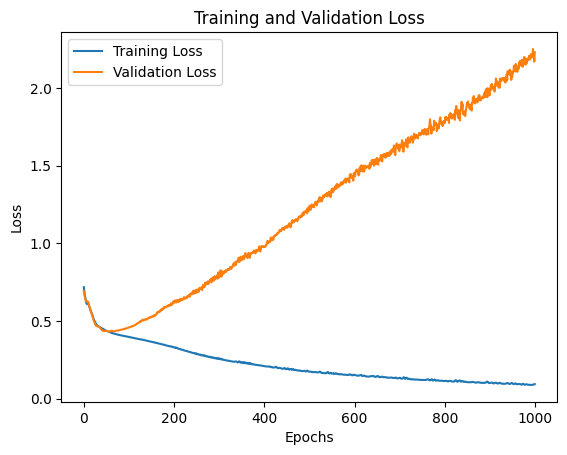

In [46]:
# Training parameters
epochs = 1000
train_losses = []
test_losses = []

# Training loop
for epoch in range(epochs):
    model_3.train()
    optimizer.zero_grad()

    # Forward pass
    y_pred = model_3(X_train)
    loss = loss_function(y_pred.squeeze(), y_train)
    train_losses.append(loss.item())

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Evaluation on test set
    model_3.eval()
    with torch.no_grad():
        y_val = model_3(X_test)
        val_loss = loss_function(y_val.squeeze(), y_test)
        test_losses.append(val_loss.item())

    # Print progress every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch+1}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")

# Plotting the losses
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), test_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

This is the example of overfitting the training data. In the Validation or the test datset the model is not performing good, while in training the loss is going down

There are many ways to fight overfitting like 
- adding drop out layer or adding Regularisation Parameter (weight decay) to optimizer.
- We can also apply the early stopping criteria where starts to overfit.
- We can try reducing the complexity of model by  changing neurons and reducing layers 
- Increasing the number of epochs
- Adjust the learning rate during training by using learning rate scheduler

In [47]:
# Method 4:Trying the drop out layer. Tried with 0.5 drop out first and then now with 0.1. Both didnt bring any improvement

class Model(nn.Module):
    def __init__(self, input_features=8, hidden1=25, hidden2=10, out_features=2, p=0.5):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.dropout1 = nn.Dropout(p)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.dropout2 = nn.Dropout(p)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = self.dropout1(x)
        x = F.relu(self.f_connected2(x))
        x = self.dropout2(x)
        x = self.out(x)
        return x

# Example usage
torch.manual_seed(4)
model_4 = Model(p=0.1)

Epoch: 1/400, Training Loss: 0.7206507325172424, Validation Loss: 0.7120932936668396
Epoch: 11/400, Training Loss: 0.7202039957046509, Validation Loss: 0.7150883078575134
Epoch: 21/400, Training Loss: 0.7202675342559814, Validation Loss: 0.7140723466873169
Epoch: 31/400, Training Loss: 0.7210153341293335, Validation Loss: 0.7135998606681824
Epoch: 41/400, Training Loss: 0.7211509943008423, Validation Loss: 0.7139623761177063
Epoch: 51/400, Training Loss: 0.7213074564933777, Validation Loss: 0.7159187197685242
Epoch: 61/400, Training Loss: 0.7203629016876221, Validation Loss: 0.7175466418266296
Epoch: 71/400, Training Loss: 0.7195439338684082, Validation Loss: 0.7132449746131897
Epoch: 81/400, Training Loss: 0.7206411957740784, Validation Loss: 0.7150419354438782
Epoch: 91/400, Training Loss: 0.7197316288948059, Validation Loss: 0.715522050857544
Epoch: 101/400, Training Loss: 0.7190955877304077, Validation Loss: 0.7126209139823914
Epoch: 111/400, Training Loss: 0.7197368144989014, Vali

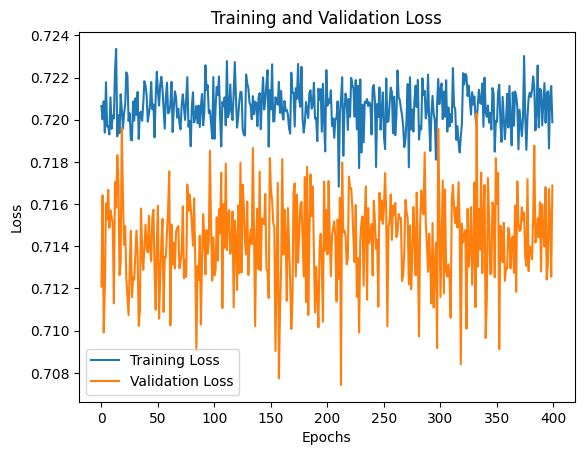

In [48]:
epochs = 400
train_losses = []
test_losses = []

# Training loop
for epoch in range(epochs):
    model_4.train()
    optimizer.zero_grad()

    # Forward pass
    y_pred = model_4(X_train)
    loss = loss_function(y_pred.squeeze(), y_train)
    train_losses.append(loss.item())

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Evaluation on test set
    model_2.eval()
    with torch.no_grad():
        y_val = model_4(X_test)
        val_loss = loss_function(y_val.squeeze(), y_test)
        test_losses.append(val_loss.item())

    # Print progress every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch+1}/{epochs}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}")

# Plotting the losses
plt.plot(range(epochs), train_losses, label='Training Loss')
plt.plot(range(epochs), test_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

##### Method 5: Let's try to fight overfitting now with L2 Regularisation parameter(weight decay), early stopping, and learning rate scheduler

In [49]:
class Model(nn.Module):
    def __init__(self, input_features=8, hidden1=26, hidden2=12, out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x


# Create the model
torch.manual_seed(4)
model_5 = Model()

In [50]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_5.parameters(), lr=0.001, weight_decay=0.01)

# Learning rate scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)

In [51]:
# Training and Validation Loop
epochs = 1000
train_losses = []
val_losses = []
best_val_loss = float('inf')
patience = 20
patience_counter = 0

for epoch in range(epochs):
    model_5.train()
    optimizer.zero_grad()
    y_pred = model_5(X_train)
    loss = criterion(y_pred, y_train)
    train_losses.append(loss.item())
    loss.backward()
    optimizer.step()

    # Validation step
    model_5.eval()
    with torch.no_grad():
        y_val = model_5(X_test)
        val_loss = criterion(y_val, y_test)
        val_losses.append(val_loss.item())
        
    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
        best_model = model_5.state_dict()
    else:
        patience_counter += 1

    if patience_counter >= patience:
        print(f'Early stopping at epoch {epoch}')
        break

    # Print losses every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Training Loss: {loss.item():.4f}, Validation Loss: {val_loss.item():.4f}')

    scheduler.step()

# Load the best model
model_5.load_state_dict(best_model)

Epoch 0, Training Loss: 0.7755, Validation Loss: 0.7581
Epoch 10, Training Loss: 0.7468, Validation Loss: 0.7340
Epoch 20, Training Loss: 0.7204, Validation Loss: 0.7119
Epoch 30, Training Loss: 0.6952, Validation Loss: 0.6907
Epoch 40, Training Loss: 0.6708, Validation Loss: 0.6702
Epoch 50, Training Loss: 0.6482, Validation Loss: 0.6530
Epoch 60, Training Loss: 0.6461, Validation Loss: 0.6512
Epoch 70, Training Loss: 0.6441, Validation Loss: 0.6494
Epoch 80, Training Loss: 0.6421, Validation Loss: 0.6477
Epoch 90, Training Loss: 0.6402, Validation Loss: 0.6460
Epoch 100, Training Loss: 0.6383, Validation Loss: 0.6445
Epoch 110, Training Loss: 0.6381, Validation Loss: 0.6444
Epoch 120, Training Loss: 0.6379, Validation Loss: 0.6442
Epoch 130, Training Loss: 0.6377, Validation Loss: 0.6440
Epoch 140, Training Loss: 0.6376, Validation Loss: 0.6439
Epoch 150, Training Loss: 0.6374, Validation Loss: 0.6437
Epoch 160, Training Loss: 0.6374, Validation Loss: 0.6437
Epoch 170, Training Loss:

<All keys matched successfully>

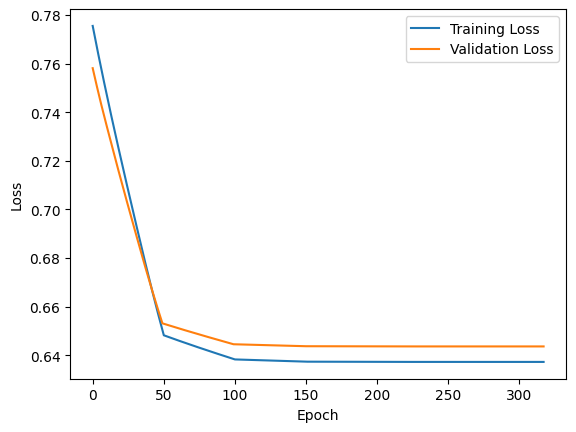

In [52]:
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [53]:
model_5.eval()
with torch.no_grad():
    y_pred_test = model_5(X_test)
    y_pred_test_class = torch.argmax(y_pred_test, dim=1)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred_test_class)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.6250


In [54]:
# Print classification report
print(classification_report(y_test, y_pred_test_class))

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_class)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.63      0.99      0.77        96

    accuracy                           0.62       152
   macro avg       0.31      0.49      0.38       152
weighted avg       0.40      0.62      0.49       152

[[ 0 56]
 [ 1 95]]


From the metrics and plot, we see that model stopped at epoch 317 in order to avoid the model to overfit. We saw that training loss and validation loss both going down with increasing epoch, and at one point they both meet and validation loss started to slightly get higher, and early stopping was triggered.

We were able to fight overfitting, however, we did not get very good accuracy. The First model on hypothesis was the one where we got the highest accuracy of 79% and the model was balanced too.

Results:
- We trained a very basic model with just input and output layer, to get an idea on the model performance on this dataset. Model did not provide clear picture of the insights, its loss was high and accuracy was low.
- We added two hidden layer along with activation function Relu, also changed the optimizer, we got the best balanced model which was not overfitting the training dataset and performance on test set was able to generalize well. Accuracy was the highest amon all models we created. i.e 79%
- However, we still tried to change the model to understand its behavior on different parameters. We considered output parameters(neurons) to be 2 i.e considering the one hot encoding label.i.e First neuron has diabetes, other has no diabetes, and from these two neurons the highest value neuron will be considered. The last layer would also go through Relu instaed of Sigmoid.Model overfit immensely.
- We used early stopping, used drop out layer, used L2 regularisation parameter(weight decay), adding the learning rate scheduler and increased the epochs, to fight overfitting. We were able to get balanced model but accuracy was low at 62%.
- Therefore, we accept the first model after hypothesis to be best one which was balanced and had accuracy at 79%.
- It is very important to try out most of the possibilities with model and see which fits all our requirement specific to the use case and dataset available. Increasing the layers/or neurons, increases the complexity of model  and it tends to learn more patterns in the datset. Simutaneously while doing this we need to take care of the overfitting issue and vanshing Gradient descent issue.


Thank You !